# Homework 5

Before you start: Read Chapter on LR, KNN and Neural Networks in the textbook.
 Note: Please enter the code along with your comments in the TODO section.
 Alternative solutions are always welcomed.

## Part 1 : KNN

## Problem 1 (25 Points)

 The objective is to classify the breast cancer data using K-NN classifier.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<b>TODO1</b><br>
 Load the breast cancer data and rename the columns to the below fields in the same order <br>Id, C_thickness, Cell_Size, Cell_Shape, Adhesion, E_Cell_Size, Bare_Nuclei, B_Chromatin, N_Nucleoli, Mitoses, Class

In [210]:
import pandas as pd

df = pd.read_csv("breast-cancer-wisconsin.txt", header=None)

df.columns = [
    "Id", "C_thickness", "Cell_Size", "Cell_Shape", "Adhesion",
    "E_Cell_Size", "Bare_Nuclei", "B_Chromatin", "N_Nucleoli",
    "Mitoses", "Class"
]

df.head()


,Id,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,0,1,2,3,4,5,6,7,8,9,10
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


 <b>TODO 2</b><br>
 Plot the heatmap for the correlation coefficients with the target variable (Class) and interpret your findings.<br>
 Drop redundant columns and view summary of the dataset. Convert all the variables to numeric

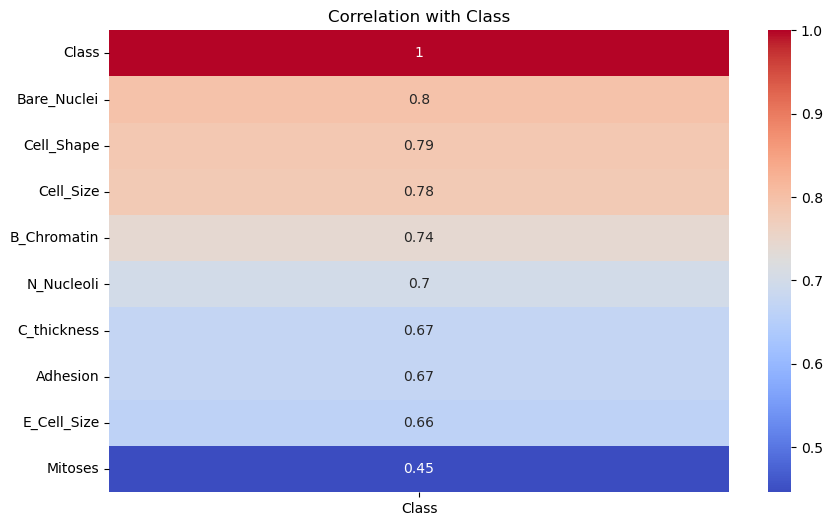

,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,684.000000,700.000000,700.000000,700.000000,700.000000
mean,4.412857,3.132857,3.207143,2.808571,3.218571,3.548246,3.442857,2.874286,1.600000,2.700000
std,2.816690,3.049577,2.969797,2.853692,2.213743,3.642399,2.440336,3.057610,1.736588,0.989935
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [212]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

if "Id" in df.columns:
    df = df.drop(columns=["Id"])

df = df.apply(pd.to_numeric, errors="coerce")

corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr[["Class"]].sort_values(by="Class", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with Class")
plt.show()

df.describe()


<b>TODO 3</b><br>
 Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why?<br>
 If so, partition the data into 75% training and 25% validation set.<br>
 Impute the missing values with the mean values of training data. Check if all the nulls are removed in both train and test dataset.<br>
 Standardize the data.<br>
 Note: When you standardize the validation set, you need to use the training set's mean and variance

In [214]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)
print("Nulls in X_train:", np.isnan(X_train_scaled).sum())
print("Nulls in X_val:", np.isnan(X_val_scaled).sum())

print("Training labels distribution:\n", y_train.value_counts())
print("Validation labels distribution:\n", y_val.value_counts())


X_train shape: (525, 9)
X_val shape: (175, 9)
Nulls in X_train: 0
Nulls in X_val: 0
Training labels distribution:
 Class
2     345
4     179
10      1
Name: count, dtype: int64
Validation labels distribution:
 Class
2    113
4     62
Name: count, dtype: int64


<b>TODO 4</b><br>
 Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    accuracy_scores.append(acc)

for k, acc in enumerate(accuracy_scores, start=1):
    print(f"k={k}: Accuracy = {acc:.4f}")

best_k = np.argmax(accuracy_scores) + 1
print(f"\nBest k = {best_k} with accuracy = {accuracy_scores[best_k-1]:.4f}")


k=1: Accuracy = 0.9543
k=2: Accuracy = 0.9429
k=3: Accuracy = 0.9714
k=4: Accuracy = 0.9657
k=5: Accuracy = 0.9714
k=6: Accuracy = 0.9600
k=7: Accuracy = 0.9714
k=8: Accuracy = 0.9714
k=9: Accuracy = 0.9771
k=10: Accuracy = 0.9714

Best k = 9 with accuracy = 0.9771


 <b>TODO 5</b><br>
 For the chosen k, display the confusion matrix and evaluate the performance of the model using recall and precision.<br>
 Check for overfitting and underfitting for the k chosen.

In [218]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_val_scaled)

conf_matrix = confusion_matrix(y_val, y_pred_final)
precision = precision_score(y_val, y_pred_final, pos_label=4)
recall = recall_score(y_val, y_pred_final, pos_label=4)

print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
 [[110   3]
 [  1  61]]
Precision: 0.9531
Recall: 0.9839


<b> TODO 6 </b><br>
 Classify the new record given below using the chosen k.<br>
 1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1


In [220]:
# New record: [5, 4, 4, 5, 7, 10, 3, 2, 1]
new_sample = np.array([[5, 4, 4, 5, 7, 10, 3, 2, 1]])

new_sample_imputed = imputer.transform(new_sample)
new_sample_scaled = scaler.transform(new_sample_imputed)

prediction = knn_final.predict(new_sample_scaled)
print("Predicted Class for new record:", prediction[0])


Predicted Class for new record: 4


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Problem 2 (25 Points)

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN regression to predict the
 mpg with the given attributes.


In [43]:
# Import the dataset "auto_mpg.csv"
df = pd.read_csv('auto_mpg.csv', na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<b>TODO 1</b> <br>
Check the unique value of the variable "car name".<br>
Would you recommend keeping "car name" for prediction? Why?<br>
If not, eliminate the variable "car name".

In [173]:
import pandas as pd
import numpy as np

df = pd.read_csv("auto_mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

df.dropna(inplace=True)

unique_car_names = df['car name'].nunique()
print(f"Unique car names: {unique_car_names} out of {len(df)} total rows")

print("\n'car name' is a high-cardinality text feature that doesn't provide structured numerical input.")
print("It may introduce noise, so it is NOT recommended for prediction.")

df.drop(columns=['car name'], inplace=True)

print("\nCleaned DataFrame Info:")
print(df.info())

print("\n👀 First 5 rows:")
print(df.head())


Unique car names: 301 out of 392 total rows

'car name' is a high-cardinality text feature that doesn't provide structured numerical input.
It may introduce noise, so it is NOT recommended for prediction.

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 392
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None

👀 First 5 rows:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         3

<b>TODO 2</b><br>
Convert the variable "origin" to dummy variables before modeling


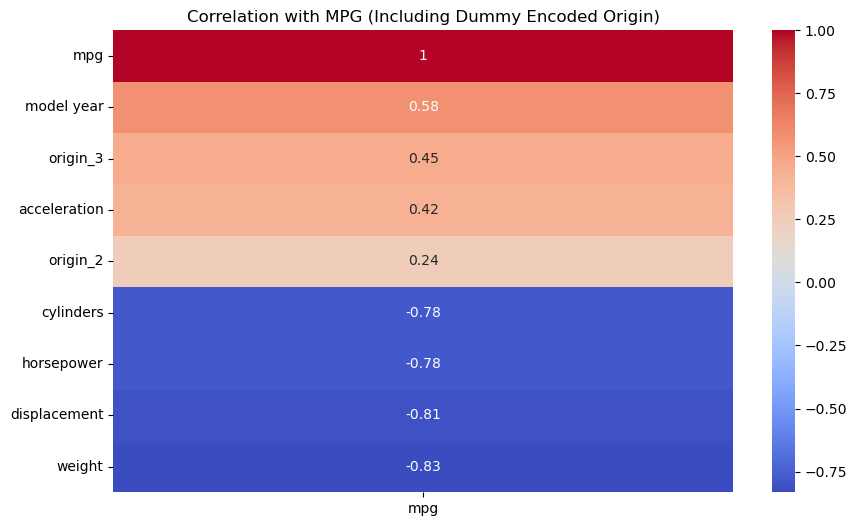

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("auto_mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))
df.dropna(inplace=True)

df.drop(columns=['car name'], inplace=True)

df = pd.get_dummies(df, columns=['origin'], prefix='origin', drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[["mpg"]].sort_values(by="mpg", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with MPG (Including Dummy Encoded Origin)")
plt.show()


<b>TODO 3</b> <br>
Rescale the numeric data. Note that dummy variables should not be rescaled.<br>
Note: When you standardize the validation set, you need to use the training set's mean and variance.<br>

In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate target
X = df.drop("mpg", axis=1)
y = df["mpg"]

# Identify numeric columns (excluding dummy variables)
numeric_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
dummy_cols = [col for col in X.columns if col not in numeric_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale only numeric features
scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled_numeric = scaler.transform(X_test[numeric_cols])

# Recombine scaled numeric with unscaled dummy variables
X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train.index)
X_train_scaled = pd.concat([X_train_scaled, X_train[dummy_cols]], axis=1)

X_test_scaled = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols, index=X_test.index)
X_test_scaled = pd.concat([X_test_scaled, X_test[dummy_cols]], axis=1)

# ✅ Output
print("Data Splitting & Scaling Complete")
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nFeature scaling applied only to numeric columns using training set statistics.")




Data Splitting & Scaling Complete
X_train shape: (294, 8)
X_test shape: (98, 8)
y_train shape: (294,)
y_test shape: (98,)

Feature scaling applied only to numeric columns using training set statistics.


<b>TODO 4</b><br>
 Partition the data into 75% training and 25% validation set.

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop("mpg", axis=1)
y = df["mpg"]

numeric_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
dummy_cols = [col for col in X.columns if col not in numeric_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled_numeric = scaler.transform(X_val[numeric_cols])

X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train.index)
X_train_scaled = pd.concat([X_train_scaled, X_train[dummy_cols]], axis=1)

X_val_scaled = pd.DataFrame(X_val_scaled_numeric, columns=numeric_cols, index=X_val.index)
X_val_scaled = pd.concat([X_val_scaled, X_val[dummy_cols]], axis=1)

mse_scores = []
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_val_scaled)
    mse = mean_squared_error(y_val, preds)
    mse_scores.append(mse)

print("\nKNN Regression MSE Scores (Validation Set):")
for k, mse in enumerate(mse_scores, start=1):
    print(f"k={k}: MSE = {mse:.4f}")

best_k = np.argmin(mse_scores) + 1
print(f"\nBest k = {best_k} with lowest MSE = {mse_scores[best_k-1]:.4f}")



KNN Regression MSE Scores (Validation Set):
k=1: MSE = 9.7750
k=2: MSE = 6.6368
k=3: MSE = 7.2797
k=4: MSE = 6.7454
k=5: MSE = 6.5216
k=6: MSE = 6.4402
k=7: MSE = 6.6163
k=8: MSE = 6.9834
k=9: MSE = 7.2500
k=10: MSE = 7.7109

Best k = 6 with lowest MSE = 6.4402


<b>TODO 5</b><br>
 Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice

In [193]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_pred = final_knn.predict(X_val_scaled)

mse_final = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nFinal KNN Model Evaluation (Validation Set)")
print(f"Best k: {best_k}")
print(f"MSE: {mse_final:.4f}")
print(f"R² Score: {r2:.4f}")



Final KNN Model Evaluation (Validation Set)
Best k: 6
MSE: 6.4402
R² Score: 0.8723


<b>TODO 6</b><br>
 Score the validation set with the best k. Comment on the model performance.

cylinders=4, displacement=140.0, horsepower=90, weight=2264, acceleration=15.5, model year=82, origin=1


In [206]:
print("Current feature columns in model:", X.columns.tolist())

new_car_input = {
    'cylinders': 4,
    'displacement': 140.0,
    'horsepower': 90,
    'weight': 2264,
    'acceleration': 15.5,
    'model year': 82,
    'origin_2': 0,
    'origin_3': 1 
}

new_car = pd.DataFrame([new_car_input])

new_car_numeric_scaled = scaler.transform(new_car[numeric_cols])

new_car_scaled = pd.DataFrame(new_car_numeric_scaled, columns=numeric_cols)
new_car_scaled = pd.concat([new_car_scaled, new_car[dummy_cols].reset_index(drop=True)], axis=1)

predicted_mpg = final_knn.predict(new_car_scaled)
print(f"\nPredicted MPG for the new car: {round(predicted_mpg[0], 2)}")


Current feature columns in model: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_2', 'origin_3']

Predicted MPG for the new car: 33.97


## Part 2: Logistic Regression

## Problem 3 (25 Points)

<b>Financial Condition of Banks</b><br>
 The file Banks.csv includes data on a sample of 20 banks.<br>
 The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response
 variable takes one of two possible values—weak or strong—according to the financial condition of the bank.<br>
 The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and
 leases to total assets and TotExp/Assets is the ratio of total expenses to total assets.<br>
 The target is to classify the financial condition of a new bank using the two ratios.<br>
 Note: 1 for financially weak banks and 0 otherwise

In [71]:
#Import the dataset
df = pd.read_csv("Banks.csv")
df.head()

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


<b>TODO 1</b><br>
Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial
measures provided.

In [146]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Banks.csv")

df.drop(columns=["Obs", "TotCap/Assets"], inplace=True)

df.columns = ["Condition", "Total_Expense_Ratio", "Loan_Lease_Ratio"]

X = df[["Total_Expense_Ratio", "Loan_Lease_Ratio"]]
y = df["Condition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

print("Logistic Regression Model Fit Complete\n")
print("Intercept:", round(log_reg.intercept_[0], 4))
print("Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"  {feature}: {round(coef, 4)}")



Logistic Regression Model Fit Complete

Intercept: -0.0139
Coefficients:
  Total_Expense_Ratio: 1.2501
  Loan_Lease_Ratio: 0.8494


<b>TODO 2</b><br>
 Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:<br>
 a. The logit as a function of the predictors<br>
 b. The odds as a function of the predictors<br>
 c. The probability as a function of the predictors

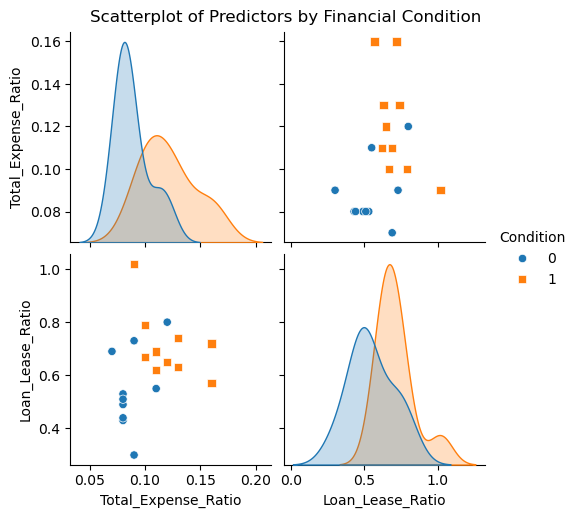

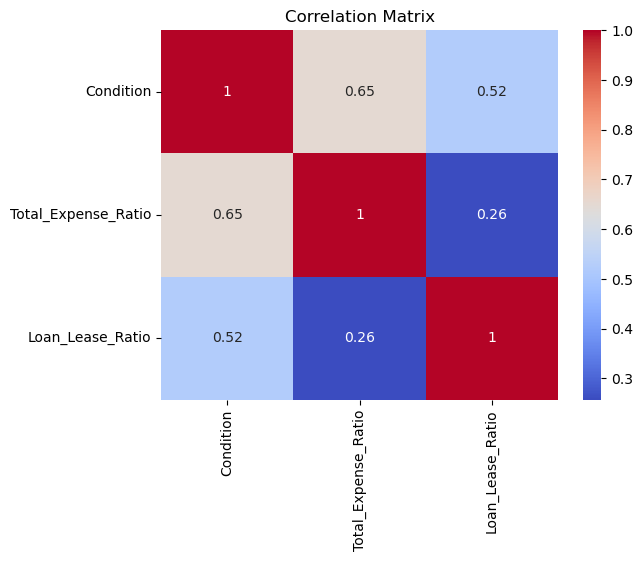


Logistic Regression Equation Forms:

a. Logit(P) = log(P / (1 - P)) = -0.0139 + 1.2501*Total_Expense_Ratio + 0.8494*Loan_Lease_Ratio
b. Odds = exp(Logit) = exp(-0.0139 + 1.2501*Total_Expense_Ratio + 0.8494*Loan_Lease_Ratio)
c. P = 1 / (1 + exp(-Logit))
   = 1 / (1 + exp(-(-0.0139 + 1.2501*Total_Expense_Ratio + 0.8494*Loan_Lease_Ratio)))


In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("Banks.csv")
df.drop(columns=["Obs", "TotCap/Assets"], inplace=True)
df.columns = ["Condition", "Total_Expense_Ratio", "Loan_Lease_Ratio"]

sns.pairplot(df, hue="Condition", markers=["o", "s"], diag_kind="kde")
plt.suptitle("Scatterplot of Predictors by Financial Condition", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

X = df[["Total_Expense_Ratio", "Loan_Lease_Ratio"]]
y = df["Condition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

intercept = model.intercept_[0]
coef1, coef2 = model.coef_[0]
features = X.columns

print("\nLogistic Regression Equation Forms:\n")

print(f"a. Logit(P) = log(P / (1 - P)) = {intercept:.4f} + {coef1:.4f}*{features[0]} + {coef2:.4f}*{features[1]}")

print(f"b. Odds = exp(Logit) = exp({intercept:.4f} + {coef1:.4f}*{features[0]} + {coef2:.4f}*{features[1]})")

print("c. P = 1 / (1 + exp(-Logit))")
print(f"   = 1 / (1 + exp(-({intercept:.4f} + {coef1:.4f}*{features[0]} + {coef2:.4f}*{features[1]})))")



<b>TODO 3</b> <br>
Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11.<br>
From your logistic regression model, estimate the following four quantities for this bank:<br>
the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

In [166]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("Banks.csv")
df.drop(columns=["Obs", "TotCap/Assets"], inplace=True)
df.columns = ["Condition", "Total_Expense_Ratio", "Loan_Lease_Ratio"]

X = df[["Total_Expense_Ratio", "Loan_Lease_Ratio"]]
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model trained and scaler fitted.\n")

new_bank = pd.DataFrame([[0.11, 0.6]], columns=["Total_Expense_Ratio", "Loan_Lease_Ratio"])
new_bank_scaled = scaler.transform(new_bank)

logit = model.decision_function(new_bank_scaled)[0]
odds = np.exp(logit)
probability = model.predict_proba(new_bank_scaled)[0][1]
classification = 1 if probability >= 0.5 else 0

print(f"🔍 New Bank Input (scaled): {new_bank_scaled}")
print(f"\nLogit (Linear score): {logit:.4f}")
print(f"Odds (exp(logit)): {odds:.4f}")
print(f"Probability of being financially weak (P): {probability:.4f}")
print(f"Classification (cutoff=0.5): {'Weak (1)' if classification == 1 else 'Strong (0)'}")



Model trained and scaler fitted.

🔍 New Bank Input (scaled): [[ 0.20241023 -0.35804155]]

Logit (Linear score): 0.0638
Odds (exp(logit)): 1.0659
Probability of being financially weak (P): 0.5160
Classification (cutoff=0.5): Weak (1)


<b>TODO 4</b><br>
 When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher
 than a financially strong bank misclassified as weak.<br>
 To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be
 increased or decreased?

In [164]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Banks.csv")
df.drop(columns=["Obs", "TotCap/Assets"], inplace=True)
df.columns = ["Condition", "Total_Expense_Ratio", "Loan_Lease_Ratio"]

X = df[["Total_Expense_Ratio", "Loan_Lease_Ratio"]]
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression Model Parameters")
print("Intercept:", log_reg.intercept_[0])
print("Coefficients:", dict(zip(X.columns, log_reg.coef_[0])))

y_probs = log_reg.predict_proba(X_test_scaled)[:, 1] 

cutoff = 0.3
y_pred_custom = (y_probs >= cutoff).astype(int)

print(f"\nPredictions using cutoff = {cutoff}:")
print("Predicted labels:", y_pred_custom.tolist())



Logistic Regression Model Parameters
Intercept: 0.1270020622117048
Coefficients: {'Total_Expense_Ratio': 1.0297071554014523, 'Loan_Lease_Ratio': 0.7585650853304131}

Predictions using cutoff = 0.3:
Predicted labels: [0, 1, 0, 1, 0]


## Part 3: Neural Networks

## Problem 4 (25 Points)

<b>Insurance Amount Prediction</b><br>
Consider the insurance data (insurance.csv). The dataset consists of age, sex, BMI(body mass index), children, smoker and
 region feature, which are independent and "charge" as a target feature. We will predict individual medical costs billed by
 health insurance

In [99]:
# Load the insurance.csv into a dataframe
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<b>TODO 1:</b><br>
 1. Load the insurance csv into a dataframe.<br>
 2. preprocess and clean the data by checking for null values.<br>
 3. Concert all the categorical variables to numerical and perform one-hot encoding.

In [142]:
import pandas as pd

df = pd.read_csv("insurance.csv")

print("Dataset Info:\n")
print(df.info())
print("\n🔍 Null Values:\n")
print(df.isnull().sum())

print("\n📊 Summary Statistics:\n")
print(df.describe())
print("\n👀 First 5 Rows:\n")
print(df.head())

df_encoded = pd.get_dummies(df, drop_first=True)

print("\nEncoded DataFrame Head:\n")
print(df_encoded.head())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

🔍 Null Values:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

📊 Summary Statistics:

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.0

<b>TODO 2:</b><br>
 Separate the X and y for predictors and target variable and create a train test split of ratio 80, 20.
 Note: TARGET_NAME = 'charges'

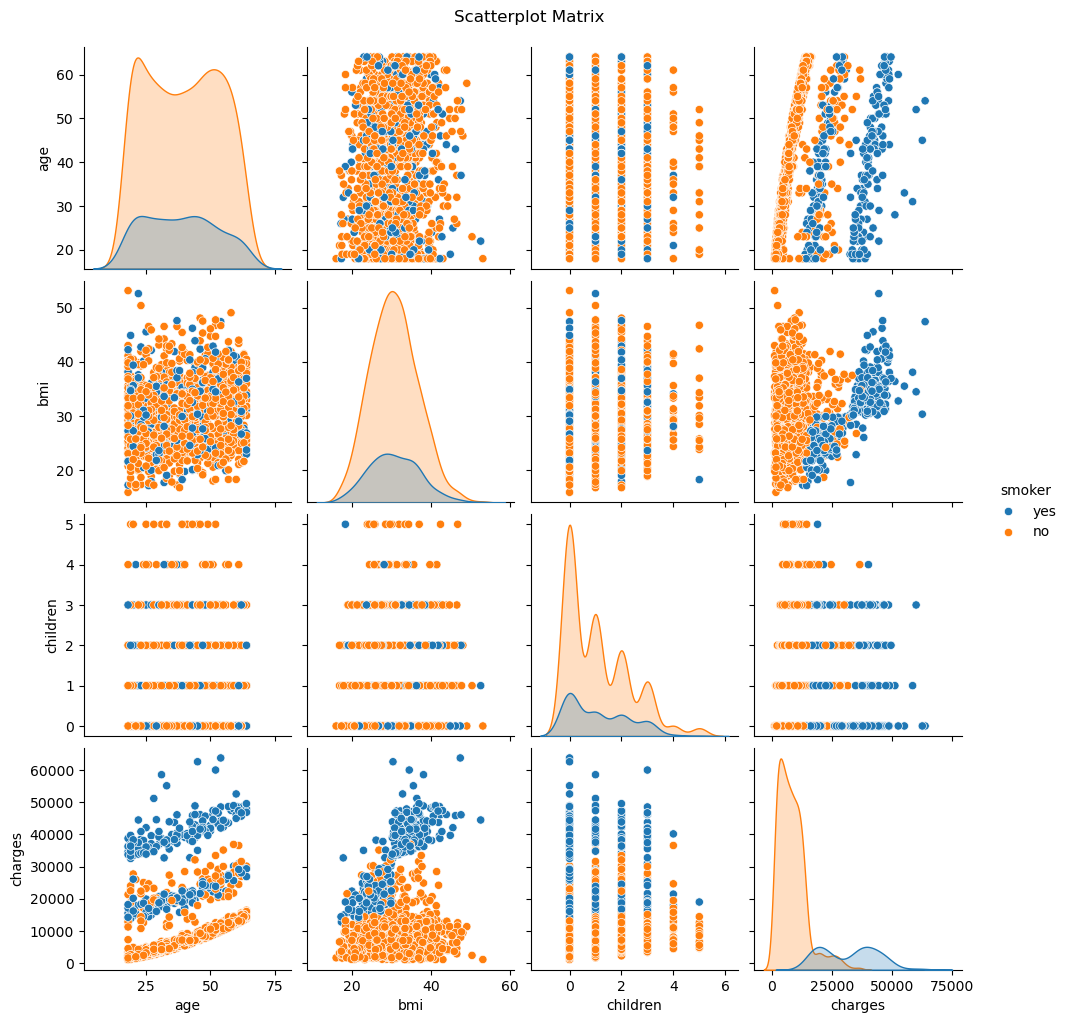

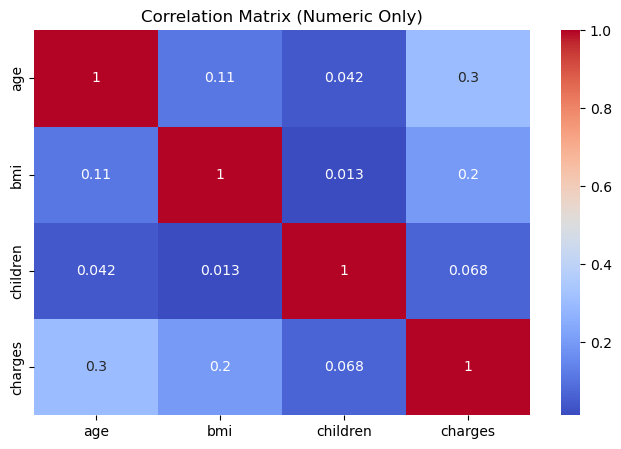

Data split complete
X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.pairplot(df, hue="smoker")
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Only)")
plt.show()

TARGET_NAME = "charges"
X = df.drop(columns=[TARGET_NAME])
y = df[TARGET_NAME]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print result shapes
print("Data split complete")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



 <b>Todo 3:</b><br>
 1. build a neural network model with 2 layers.<br>
 Layer 1: first layer should contian 10 nodes. You are free to choose any activation function for the first layer.<br>
 Layer 2: Use your intuition to decide on the number of nodes and activation function that can be used for layer 2. (You
 can research about the output layer regression models for neural networks)<br>
 1. Train the model for 2000 iterations.<br>
 Let this be model1<br>
      Ref: https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural
networks-in-tensorflow/


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)


✅ Test Set Evaluation:
Mean Absolute Error: $3998.01


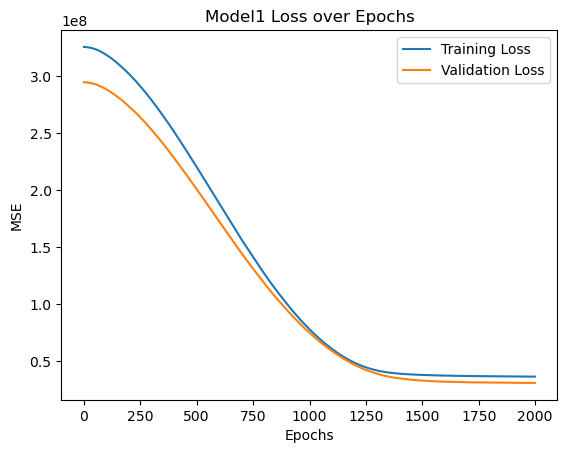

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess data
df = pd.read_csv("insurance.csv")
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Build model1
model1 = Sequential([
    Dense(10, input_shape=(X_train_scaled.shape[1],), activation='relu'),  # First hidden layer
    Dense(1)  # Output layer (regression, no activation function = linear)
])

# Compile model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model1.fit(X_train_scaled, y_train, epochs=2000, batch_size=32, validation_split=0.1, verbose=0)

# Print model summary
model1.summary()

# Evaluate the model
loss, mae = model1.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Test Set Evaluation:\nMean Absolute Error: ${mae:.2f}")

# Plot loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model1 Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()



<b>Todo 4:</b><br>
 Plot the training and validation loss for model1

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model
model = Sequential([
    Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # output layer for regression
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

<b>Todo 5:</b><br>
 build a deep neural network model with 4 layers.<br>
 Layer 1: first layer should contian 50 nodes. You are free to choose any activation function for the first layer.<br>
 Layer 2: first layer should contian 30 nodes. You are free to choose any activation function for the first layer.<br>
 Layer 3: first layer should contian 20 nodes. You are free to choose any activation function for the first layer.<br>
 Layer 4: Use your intuition to decide on the number of nodes and activation function that can be used for layer . (You can
 research about the output layer regression models for neural networks)<br>
 Train the model for 5000 iterations.<br>
 Let this be model2

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,865 (30.73 KB)

 Trainable params: 2,621 (10.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,244 (20.49 KB)

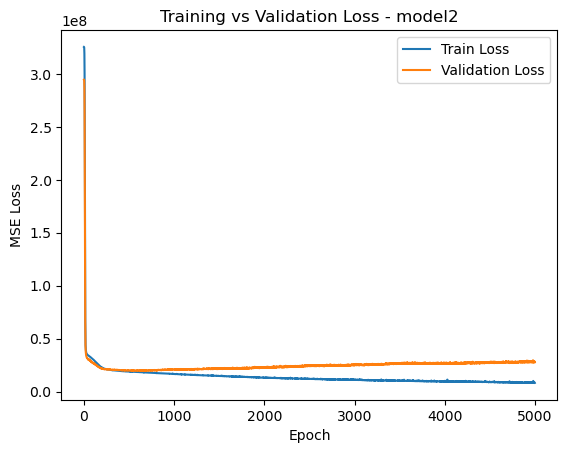


✅ Test Evaluation:
Mean Absolute Error: $3712.69


In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define model2
model2 = Sequential([
    Dense(50, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)  # Linear activation by default for regression
])

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model for 5000 epochs
history2 = model2.fit(X_train_scaled, y_train, epochs=5000, batch_size=32, validation_split=0.1, verbose=0)

# Show model summary
model2.summary()

# Plot training history
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss - model2')
plt.legend()
plt.show()

# Optional: Evaluate model on test data
loss, mae = model2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Test Evaluation:\nMean Absolute Error: ${mae:.2f}")



<b>Todo 6:</b><br>
 Plot the training and validation loss for model2.

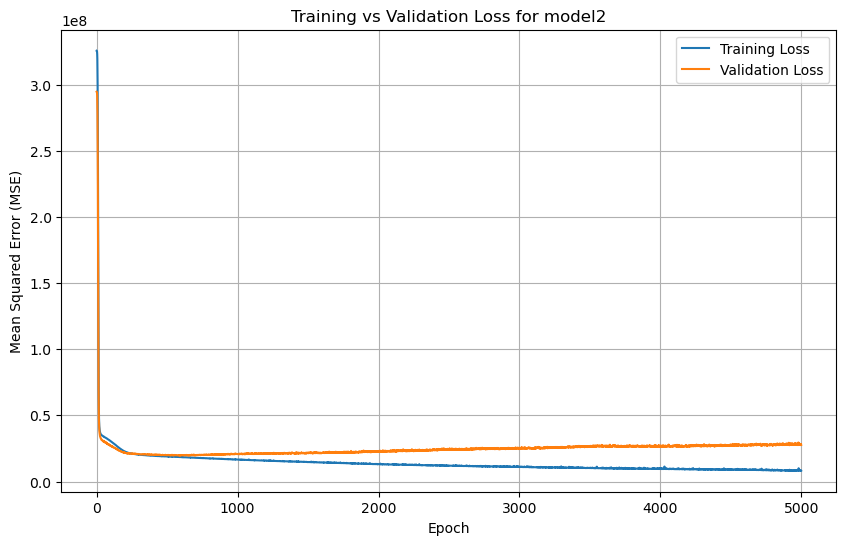

Model2 Evaluation on Test Set
Mean Absolute Error (MAE): $3712.69


In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation Loss for model2')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model2.evaluate(X_test_scaled, y_test, verbose=0)

print("Model2 Evaluation on Test Set")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")



<b>Todo 7: Comparing model 1 and 2.</b><br>
 1. predict the charges for test data using model 1 and 2.<br>
 2. using mse as performance evaluation metrics, comment of model performance for the test data.<br>
 3. Compare the performance of model 1 and 2.<br>
 What do you understand from the models built.


In [138]:
from sklearn.metrics import mean_squared_error

y_pred_model1 = model1.predict(X_test_scaled)
y_pred_model2 = model2.predict(X_test_scaled)

mse_model1 = mean_squared_error(y_test, y_pred_model1)
mse_model2 = mean_squared_error(y_test, y_pred_model2)

print("📊 Model Performance on Test Set")
print(f"Model 1 MSE: {mse_model1:.2f}")
print(f"Model 2 MSE: {mse_model2:.2f}")

if mse_model1 < mse_model2:
    print("\n✅ Model 1 performed better with lower test MSE.")
elif mse_model2 < mse_model1:
    print("\n✅ Model 2 performed better with lower test MSE.")
else:
    print("\n⚖️ Both models performed equally well.")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
📊 Model Performance on Test Set
Model 1 MSE: 31949525.65
Model 2 MSE: 33591190.94

✅ Model 1 performed better with lower test MSE.
